In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def get_normal_dist(center_list=[0.0, 10.0, 20.0, 30.0, 50.0, 100.0]):
    right = center_list[0] - 20
    left = center_list[-1] + 20
    width = (right - left)
    num_grids = 10**5
    diff = width / num_grids
    pos = [left + diff * i for i in range(num_grids)]
    norm = np.sqrt(2 * np.pi) * len(center_list)
    normal = []
    for i in range(num_grids):
        temp = 0
        for center in center_list:
            temp += np.exp(-0.5 * (left + diff * i - center)**2) 
        temp /= norm 
        normal.append(temp)
    return pos, normal

In [3]:
def do_MCMC(niter=10**7, x=0.0, seed=1111, dice=[1, 10, 20, 30, 50, 100], center_list=[0.0, 10.0, 20.0, 30.0, 50.0, 100.0]):
    naccept = 0
    data = []
    np.random.seed(seed)
    for i in range(niter):
        c = dice[np.random.randint(0, 6)]
        step_left = -c
        step_right = c
        backup_x = x
        action_init = -np.log(sum([np.exp(-0.5*(x- center)**2) for center in center_list]) + 1e-10)
        # dx in [step_left, step_right]
        dx = (step_right - step_left) * np.random.rand() + step_left
        x += dx
        action_fin= -np.log(sum([np.exp(-0.5*(x- center)**2) for center in center_list]) + 1e-10)
        if np.exp(action_init - action_fin) > np.random.rand():
            # accept
            naccept += 1
        else:
            x = backup_x
        data.append(x)
    return data

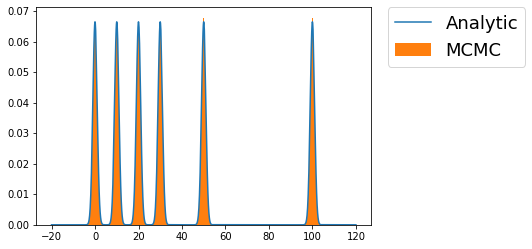

In [4]:
data = do_MCMC()
pos, normal = get_normal_dist()
plt.plot(pos, normal, label='Analytic')
plt.hist(data, bins=1000, density=True, label='MCMC')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=18)
plt.savefig('./fig/practice4_3_iter10_7.jpg', bbox_inches="tight")
plt.show()